# Lasso linear regression example

**Example using the lasso linear regression function in the PyMLR module**

The **lasso** function provides output of regression models and summary statistics using the following methods:

- LassoCV: Lasso using Cross-Validation with coordinate descent  
- LassoLarsCV: Lasso using Cross-Validation with Least Angle Regression
- LassoLarsIC using AIC: Lasso using Least Angle Regression with Akaike Information Criterion
- LassoLarsIC using BIC: Lasso using Least Angle Regression with Bayesian Information Criterion

The **lasso** function standardizes the X input by default. 

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes dataset from sklearn.

Before running this notebook, first install the PyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [2]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [3]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Lasso regression models, please wait ...

Lasso regression statistics of best models in model_outputs['stats']:

| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     0.13426     |     0.555863    |     0.108553    |     1.34583     |
| r-squared          |     0.527017    |     0.524041    |     0.527097    |     0.518773    |
| adjusted r-squared |     0.513187    |     0.510124    |     0.513269    |     0.507582    |
| n_samples          |   353           |   353           |   353           |   353           |
| df residuals       |   343           |   343           |   343           |   345           |
| df model           |     9           |     9           |     9           |     7           |
| F-statistic        |    42.4649      |    41.9612      |    42.4785      |    53.1311      |
| Prob (F-statistic) |  

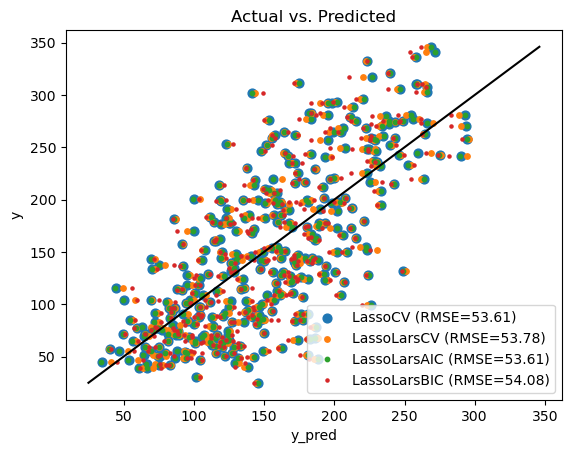

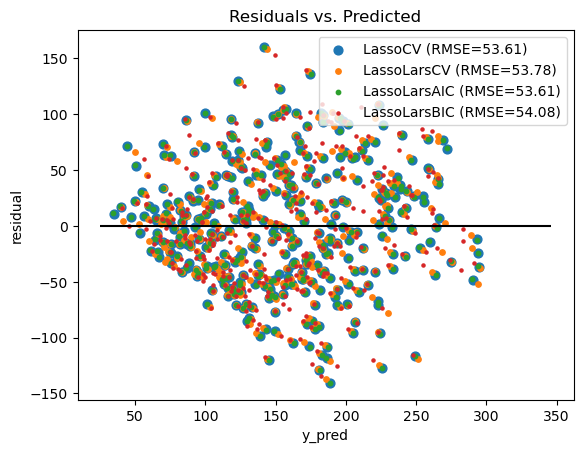

In [5]:
# Use the stacking function in the stepAIC module
from PyMLR import lasso
train_model, train_output = lasso(X_train, y_train, verbose=1)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. To standardize the testing data we will use the same preprocess_result scaler that was used to standardize the training data to avoid data leakage between the training and testing data. 


Goodness of fit to testing data in result['metrics']:

| Statistic          |   Regressor |
|:-------------------|------------:|
| R-squared          |    0.455972 |
| MSE                | 2882.34     |
| RMSE               |   53.6874   |
| Explained Variance |    0.458906 |
| MAE                |   42.8249   |
| Max Error          |  152.725    |
| MAPE               |    0.374222 |
| MSLE               |    0.17363  |
| n_samples          |   89        |



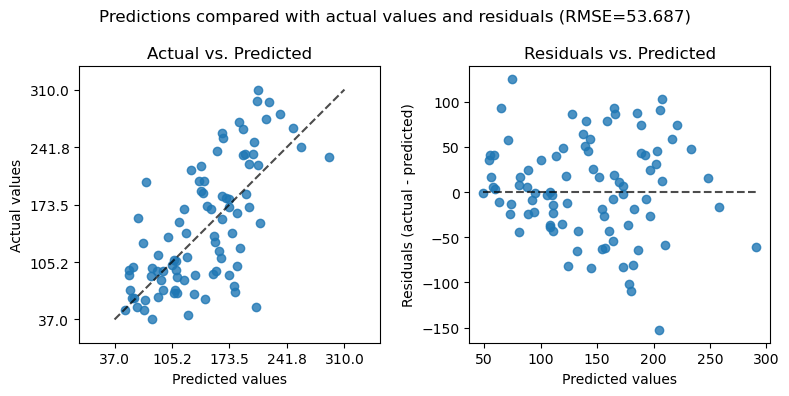

In [6]:
from PyMLR import test_model
test_output = test_model(train_model['LassoCV'], X_test, y_test, 
    preprocess_result= train_output['preprocess_result'])

# save the plot of predictions vs actual and residuals
test_output['fig'].savefig("LassoCV_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

In the next step we will fit the model using all of the X and y data. The lasso function recalculates the standard scaler and encoder by default (the user also has the option to input a previously calculated scaler/encoder in a previous preprocess_result).

Fitting Lasso regression models, please wait ...

Lasso regression statistics of best models in model_outputs['stats']:

| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     0.090737    |     1.42227     |     1.55508     |     1.55508     |
| r-squared          |     0.517387    |     0.506424    |     0.508597    |     0.508597    |
| adjusted r-squared |     0.505041    |     0.496142    |     0.499518    |     0.499518    |
| n_samples          |   442           |   442           |   442           |   442           |
| df residuals       |   431           |   433           |   434           |   434           |
| df model           |    10           |     8           |     7           |     7           |
| F-statistic        |    46.2055      |    55.534       |    64.1694      |    64.1694      |
| Prob (F-statistic) |  

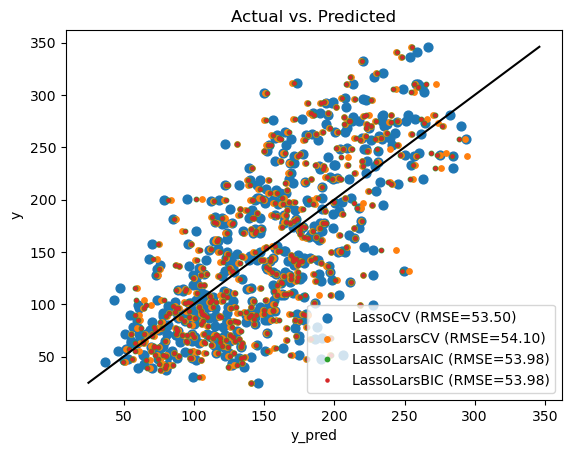

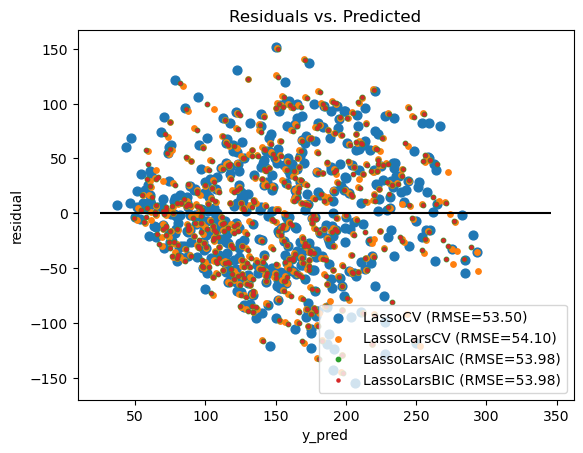

In [7]:
from PyMLR import lasso
final_model, final_output = lasso(X, y, verbose=1)

## User instructions

In [15]:
help(lasso)

Help on function lasso in module PyMLR:

lasso(X, y, **kwargs)
    Python function for Lasso linear regression
    using k-fold cross-validation (CV) or to minimize AIC or BIC

    by
    Greg Pelletier
    gjpelletier@gmail.com
    17-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        nfolds= number of folds to use for cross-validation (CV)
            with k-fold LassoCV or LassoLarsCV (default nfolds=20)
        preprocess= True,           # Apply OneHotEncoder and StandardScaler
        preprocess_result= None,    # dict of the following result from
                                    # preprocess_train if available:
                                    # - encoder          (OneHotEnc